# OK Cupid Date-a-Scientist project

***

This project is in the scope of my training at Codecademy.

This is about analyzing a dataset of OKCupid user profiles to practice formulating questions and implementing machine learning techniques to answer those questions.

Data sources:
profiles.csv was provided by Codecademy.com.


## Project Goals

***

As it could have its importance to propose the best match for a user, we are going to focus on astrological signs. 

Many users doesn't precise their sign.

It could be interesting for OKCupid to know whether or not we can predict the sign for a user that did not give the information to help him to find his/her soulmate.


## 1. Explore and clean the data

***

In [1]:
# import needed libraries to explore data
import pandas as pd
from IPython.display import display

# for a better display of dataframe in Jupyter Notebook
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

# have a look to first rows of the datasets and general information
profiles = pd.read_csv('profiles.csv')
display(profiles.head(5))
print(profiles.info())

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

We have 30 columns and 59 946 rows. Each row describe a user and his/her characteristics. 
Some data are missing probably because users do not necesseraly complete all their profiles.

### Value we want to predict

***

Let's first have a look to our value: sign.

In [2]:
#show all the categories in sign and their counts
print(profiles.sign.value_counts(dropna=False))

NaN                                              11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
libra but it doesn&rsquo;t matter                 1408
aquarius b

As discussed above, we can see that there is an important part of Null Values (11 056).

Plus, we expected to find 12 signs but there's actually additional categories to precise whether or not it matters for the user. 

This precision doesn't matter for us, let's regroup the signs.

In [3]:
#only the first word of each value matters
profiles['sign_clean'] = profiles.sign.apply(lambda x: x.split()[0] if type(x) == str else x)

# check if the cleaning is efficient
print(profiles.sign_clean.value_counts(dropna=False))

NaN            11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: sign_clean, dtype: int64


Our label column is ready. Let's now have a look to the features that could help to predict sign.

### Features

***

Here are the features we believe could impact sign:
'body_type', 'diet', 'drinks', 'drugs', 'education', 'income', 'job', 'orientation', 'smokes', 'religion'

Let's explore one by one.

#### body_type
***

average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


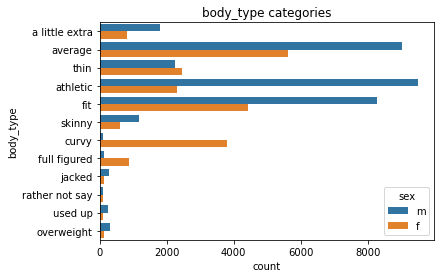

In [4]:
# import needed libraries to plot figures
import matplotlib.pyplot as plt
import seaborn as sns

# look at the different categories
print(profiles.body_type.value_counts(dropna=False))

sns.countplot(data=profiles, y="body_type", hue='sex')
plt.title('body_type categories')
plt.show()

We can notice that some description are more used by women than by man (for instance: curvy) and in the opposite way as well.

Nothing specific to modify here.

#### diet
***

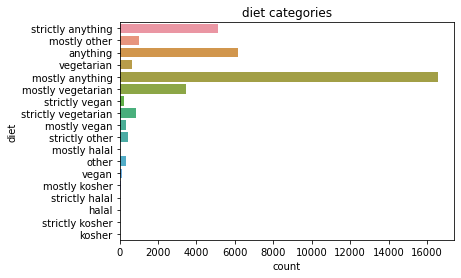

In [5]:
# look at the different categories
sns.countplot(data=profiles, y="diet")
plt.title('diet categories')
plt.show()

#### drinks
***

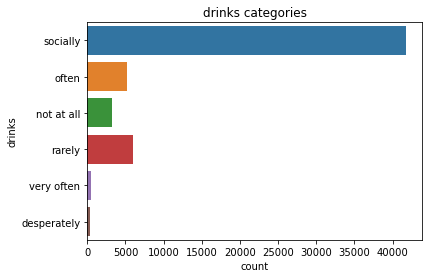

In [6]:
# look at the different categories
sns.countplot(data=profiles, y="drinks")
plt.title('drinks categories')
plt.show()

#### drugs
***

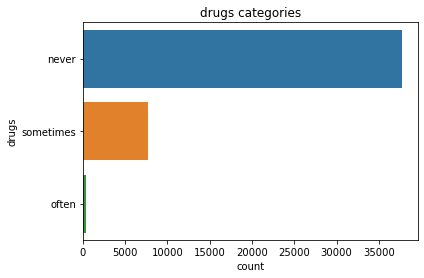

In [7]:
# look at the different categories
sns.countplot(data=profiles, y="drugs")
plt.title('drugs categories')
plt.show()

#### education
***

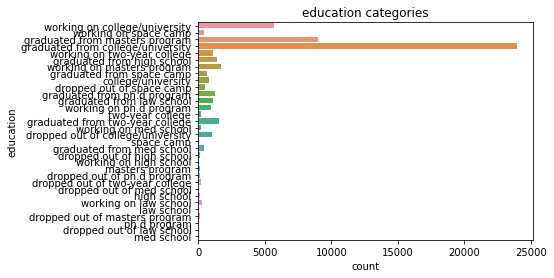

In [8]:
# look at the different categories
sns.countplot(data=profiles, y="education")
plt.title('education categories')
plt.show()

#### income
***

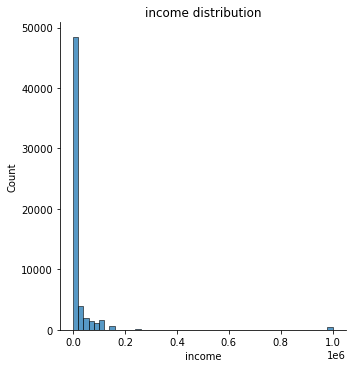

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64


In [9]:
# look at the different categories
sns.displot(data=profiles, x="income", bins=50)
plt.title('income distribution')
plt.show()
print(profiles.income.value_counts(dropna=False))

A vaste majority of user does not mention their salary, we should then remove this feature out of our model.

#### job
***

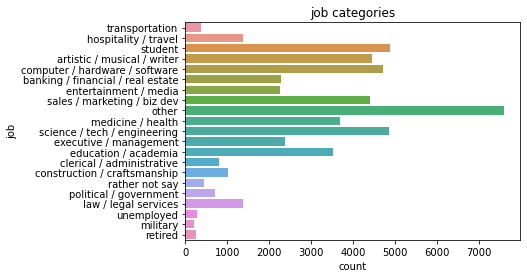

In [10]:
# look at the different categories
sns.countplot(data=profiles, y="job")
plt.title('job categories')
plt.show()

#### orientation
***

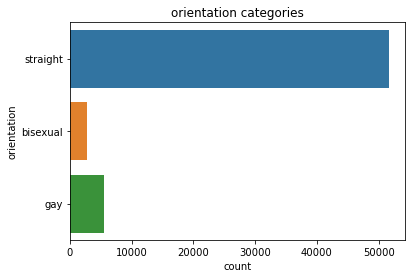

In [11]:
# look at the different categories
sns.countplot(data=profiles, y="orientation")
plt.title('orientation categories')
plt.show()

#### smokes
***

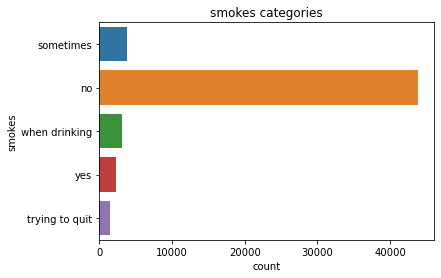

In [12]:
# look at the different categories
sns.countplot(data=profiles, y="smokes")
plt.title('smokes categories')
plt.show()

#### religion
***

In [13]:
# look at the different categories and their counts
print(profiles.religion.value_counts(dropna=False))

NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
judaism and 

A lot of precision is bring to Religion with subcategories. We don't need that level of precision so let's regroup categories as we did with sign.

In [14]:
# regroup categories
profiles['religion_clean'] = profiles.religion.apply(lambda x: x.split()[0] if type(x) == str else x)

# check
print(profiles.religion_clean.value_counts(dropna=False))

NaN             20226
agnosticism      8812
other            7743
atheism          6985
christianity     5787
catholicism      4758
judaism          3098
buddhism         1948
hinduism          450
islam             139
Name: religion_clean, dtype: int64


It looks better.

Let's do a final polish, and the cleaning will be done.

#### Finalize cleaning by removing NaN
***

In [15]:
# our selected columns for our model
columns = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'orientation', 'smokes', 'religion_clean', 'sign_clean']

# select the dataset will be working on
dataset = profiles[columns]
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   body_type       54650 non-null  object
 1   diet            35551 non-null  object
 2   drinks          56961 non-null  object
 3   drugs           45866 non-null  object
 4   education       53318 non-null  object
 5   job             51748 non-null  object
 6   orientation     59946 non-null  object
 7   smokes          54434 non-null  object
 8   religion_clean  39720 non-null  object
 9   sign_clean      48890 non-null  object
dtypes: object(10)
memory usage: 4.6+ MB
None


We will now remove all the NaN values within this dataset.

In [16]:
# remove NaN values
dataset = dataset.dropna()

# check
print(dataset.info())
display(dataset.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15504 entries, 0 to 59944
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   body_type       15504 non-null  object
 1   diet            15504 non-null  object
 2   drinks          15504 non-null  object
 3   drugs           15504 non-null  object
 4   education       15504 non-null  object
 5   job             15504 non-null  object
 6   orientation     15504 non-null  object
 7   smokes          15504 non-null  object
 8   religion_clean  15504 non-null  object
 9   sign_clean      15504 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB
None


,body_type,diet,drinks,drugs,education,job,orientation,smokes,religion_clean,sign_clean
0,a little extra,strictly anything,socially,never,working on college/university,transportation,straight,sometimes,agnosticism,gemini
1,average,mostly other,often,sometimes,working on space camp,hospitality / travel,straight,no,agnosticism,cancer
7,average,mostly anything,socially,never,graduated from college/university,artistic / musical / writer,straight,no,christianity,sagittarius
9,athletic,mostly anything,not at all,never,working on two-year college,student,straight,no,atheism,cancer
11,average,mostly anything,socially,never,graduated from college/university,banking / financial / real estate,straight,no,christianity,leo


We end up with a dataset with 15 504 non null samples out of the 59 946 initial.
15 504 is still a relatively high amount of data to build a model. 

But let's have a look if we still have a homogeneous distribution for our label 'sign' after removing the NaN.

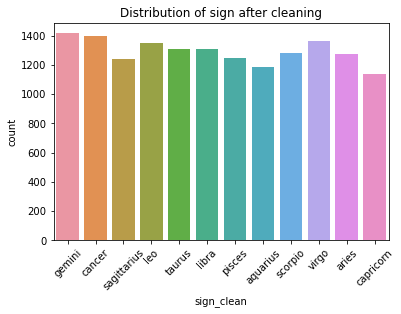

In [17]:
# check distribution of categories
sns.countplot(data=dataset, x='sign_clean')
plt.title('Distribution of sign after cleaning')
plt.xticks(rotation=45)
plt.show()

Each label is well represented, we are ready to move forward.

## 2. Prepare the data

***

### Convert strings into integers

***

All our features are categorical of type string. We need to convert into integers before building the model. The selected features are not ordinal data, we don't want numbers that will be given represent any order or weight. For that we will use One-Hot encoding that has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' .get_dummies() method.

In [18]:
# select features
features = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'orientation', 'smokes', 'religion_clean']

# create dataset of features
df = dataset[features]

# use get_dummies to convert string categories into integers
for feature in features:
    df = pd.get_dummies(df, columns=[feature], prefix = [feature])
    
# check
display(df.head())

,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,education_dropped out of two-year college,education_graduated from college/university,education_graduated from high school,education_graduated from law school,education_graduated from masters program,education_graduated from med school,education_graduated from ph.d program,education_graduated from space camp,education_graduated from two-year college,education_high school,education_law school,education_masters program,education_med school,education_ph.d program,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,job_medicine / health,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,orientation_bisexual,orientation_gay,orientation_straight,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,religion_clean_agnosticism,religion_clean_atheism,religion_clean_buddhism,religion_clean_catholicism,religion_clean_christianity,religion_clean_hinduism,religion_clean_islam,religion_clean_judaism,religion_clean_other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### Split the data

***

In [19]:
# import function to build train and test sets
from sklearn.model_selection import train_test_split 

# create train and test sets
X = df
y = dataset['sign_clean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Alright data is ready now, let's build models.

## 3. Build models

***

Let's compare 3 differents classification models.

### Train and test the models

***

In [29]:
# import 3 differents models we will compare
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# create a list of our models in which we will iterate
models = [
    LinearSVC(),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=20, random_state=1)
]

# iterate through the list, train models, and get their accuracy scores on train and test sets
for model in models:
    model.fit(X_train, y_train)
    print('{}'.format(model.__class__.__name__))
    print('Train score: {:.2f}%'.format(model.score(X_train, y_train)*100))
    print('Test score: {:.2f}%'.format(model.score(X_test, y_test)*100))
    print('\n')

LinearSVC
Train score: 12.66%
Test score: 8.32%


KNeighborsClassifier
Train score: 25.59%
Test score: 8.06%


RandomForestClassifier
Train score: 84.68%
Test score: 8.29%




Results are poor. 

RandomForestClassifier appears to have the best accuracy on the train set but all three are pretty bad when it comes to generalize to the test set.

Parameters have been set randomly, so let's see if we can optimize the result.

### Optimize the model

***
#### KNeighborsClassifier
Let's begin with KNeighborsClassifier. One parameter we can play with is the number of neighbors.

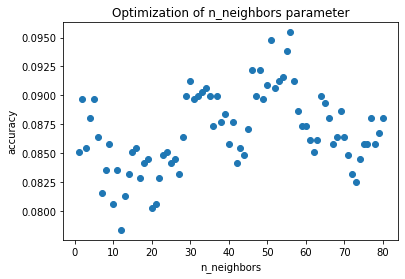

In [21]:
# set up numbers of neighbors we want to try and the list to store the results
neighbors = 80
scores = []

# find the best number of neighbors to improve the KNeighborsClassifier.
for n in range(1, neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# plot score in fuction of number of neighbors
plt.scatter(range(1, neighbors + 1), scores)
plt.title('Optimization of n_neighbors parameter')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

In [22]:
# print the optimized number of neighbors
print('n° of neighbors for highest accuracy: {}'.format(range(1, neighbors + 1)[scores.index(max(scores))]))

n° of neighbors for highest accuracy: 56


Maximum accuracy is around 9.5% and is obtained with 56 neighbors. 
Then the accuracy decreases after this number.

But it takes more time to run the calculation with 56 neighbors. 
A good compromise between speed and accuracy could be that we take 5 neighbors.

#### RandomForestClassifier
Let's try to optimize now RandomForestClassifier. One parameter we can play with is the number of trees in the forest (n_estimators).

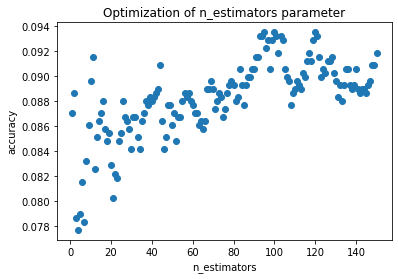

In [23]:
# set up numbers of trees we want to try and the list to store the results
trees = 150
scores = []

# find the best number of trees to improve the RandomForestClassifier.
for n in range(1, trees + 1):
    forest = RandomForestClassifier(n_estimators=n, random_state=1)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))

# plot score in fuction of number of neighbors
plt.scatter(range(1, trees + 1), scores)
plt.title('Optimization of n_estimators parameter')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [27]:
# print the optimized number of trees
print('n° of trees for highest accuracy with RandomForestClassifier: {}'.format(range(1, trees + 1)[scores.index(max(scores))]))

n° of trees for highest accuracy with RandomForestClassifier: 95


Maximum accuracy is around 9.35% and is obtained with 95 trees. Not really better than KNeighborsClassifier.
Then the accuracy decreases after 95 trees.

### Pick a model

***

It seems that with a high number of trees, RandomForestClassifier is longer to run than KNeighborsClassifier with no better accuracy.
So we will probably prefer KNeighborsClassifier over the two.

To have more detail let's display the confusion matrix with KNeighborsClassifier.

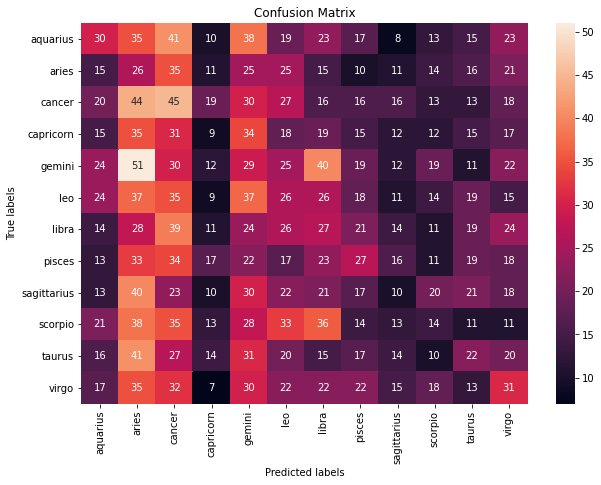

In [25]:
# create the model with optimized # of neighbors and fit
knn = KNeighborsClassifier(n_neighbors=56).fit(X_train, y_train)

# import function to create the confusion_matrix
from sklearn.metrics import confusion_matrix 

# create the confusion_matrix
knn_predict = knn.predict(X_test) 
matrix = confusion_matrix(y_test, knn_predict)

# set up labels for the plot
knn_labels = knn.classes_

# plot the confusion matrix with heatmap for better visibility
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels)
ax.yaxis.set_ticklabels(knn_labels)

plt.show()

Confusion matrix is good tool to see in details which label we predict better and with which ones we fail.
In this case, it fails for all :/ 
The model is actually poorly precise, that's why. 

Actually, we expected that because it sounds logic that our astrological sign doesn't determine our way of life, body type, religion, etc... hopefully :).